In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

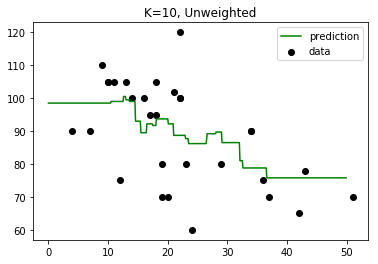

In [2]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

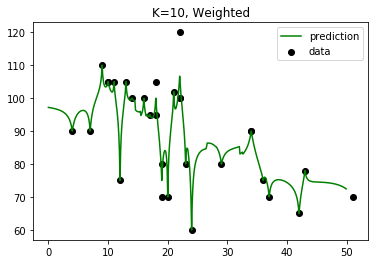

In [3]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, .1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [4]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


### Experimenting

In [5]:
import sklearn
from sklearn import preprocessing, cross_validation, neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=18)

X = np.array(music.drop(['bpm'], 1))
y = np.array(music['bpm'])

knn_w.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=18, p=2,
          weights='uniform')

In [6]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=18, weights='distance')

X = np.array(music.drop(['bpm'], 1))
y = np.array(music['bpm'])

knn_w.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=18, p=2,
          weights='distance')

In [7]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.23 (+/- 0.60)


### Combining Features

In [8]:
dur_max = music['duration'].max()
music['dur_norm'] = music['duration']/dur_max
loud_max = music['loudness'].max()
music['loud_norm'] = music['loudness']/loud_max
music['dur_loud_norm'] = music['dur_norm'] + music['loud_norm']
music.head()

,duration,loudness,bpm,dur_norm,loud_norm,dur_loud_norm
0,184,18,105,0.456576,0.352941,0.809517
1,134,34,90,0.332506,0.666667,0.999173
2,243,43,78,0.602978,0.843137,1.446115
3,186,36,75,0.461538,0.705882,1.167421
4,122,22,120,0.302730,0.431373,0.734102


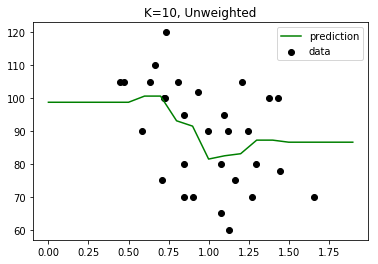

In [9]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=8)
X = music[['dur_loud_norm']]
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 2, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

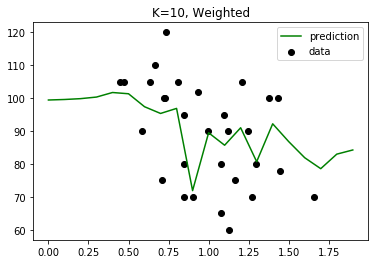

In [10]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=8, weights='distance')
X = music[['dur_loud_norm']]
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 2, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=8)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=8)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.20 (+/- 1.00)
Weighted Accuracy: -0.55 (+/- 1.46)


Adding the second feature to the dataframe only seemed to confuse the model even more, as the average R-squared values were even worse than with only the one feature. The best KNN value I could find was around k=18, which is about 60 percent of the data set. I would have expected this number to be less, but that is where it seemed to maximize. Despite the average R-squared value being poorer in the two-feature model, the variance of the weighted model improved over that of the unweighted model, which was not the case in the model of only one feature. 

I also tested a model that normalized and combined the two features. Overall, this model was similar in its poor R-squared values. One interesting thing to note was that the unweighted accuracy of this model was better than the weighted accuracy, which was not the case for the previous two models. 